In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('FDcurve_specimen1.txt', delimiter=',')

print(df.columns)
force = df["Load(kN)"].to_numpy()
extension = df["Extensometer(mm/mm)"].to_numpy()

print(force)
print(extension)
# plot

# import matplotlib.pyplot as plt
# plt.plot(extension, force)

Index(['Time(s)', 'Crosshead(mm)', 'Load(kN)', 'Extensometer(mm/mm)',
       'Stress(MPa)'],
      dtype='object')
[ 0.273  0.291  0.311 ...  8.081  7.84  -0.393]
[1.0000e-05 1.0000e-05 2.0000e-05 ... 1.7497e-01 1.7493e-01 1.7586e-01]


[[1738.12619997]]


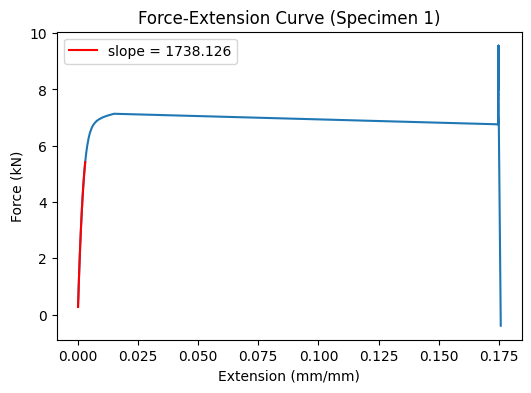

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(extension, force)

# calculate slope of elastic region

import sklearn.linear_model
import numpy as np

# elastic region
elastic_region = np.where(extension < 0.003)

# linear regression
reg = sklearn.linear_model.LinearRegression()
reg.fit(extension[elastic_region].reshape(-1, 1), force[elastic_region].reshape(-1, 1))
print(reg.coef_)
plt.plot(extension[elastic_region], force[elastic_region], 'r', label="slope = " + str(round(reg.coef_[0][0], 3)))
plt.xlabel('Extension (mm/mm)')
plt.ylabel('Force (kN)')
plt.title('Force-Extension Curve (Specimen 1)')
plt.legend()